# Workgroup 4 

- Andrea Ulloa
- Angela Coapaza
- Ana Angulo

# Orthogonal Learning

- The equation of Y for the three cases now is: Y = 5*D + beta*X + rnorm(n)
- B = 50 , B = 100, B = 1000.
- Explain what you observe in the distribution of the histograms. Where the orthogonal and Naive should be centered?
- Why does this happen? Give an econometric explanation of this.
- Label your axes and legends correctly in your figures.
- The analysis should be done in Python , R and Julia

## Simulation Design 1

In [ ]:
## B =50

In [21]:
##install.packages("hdm")
library(hdm)

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

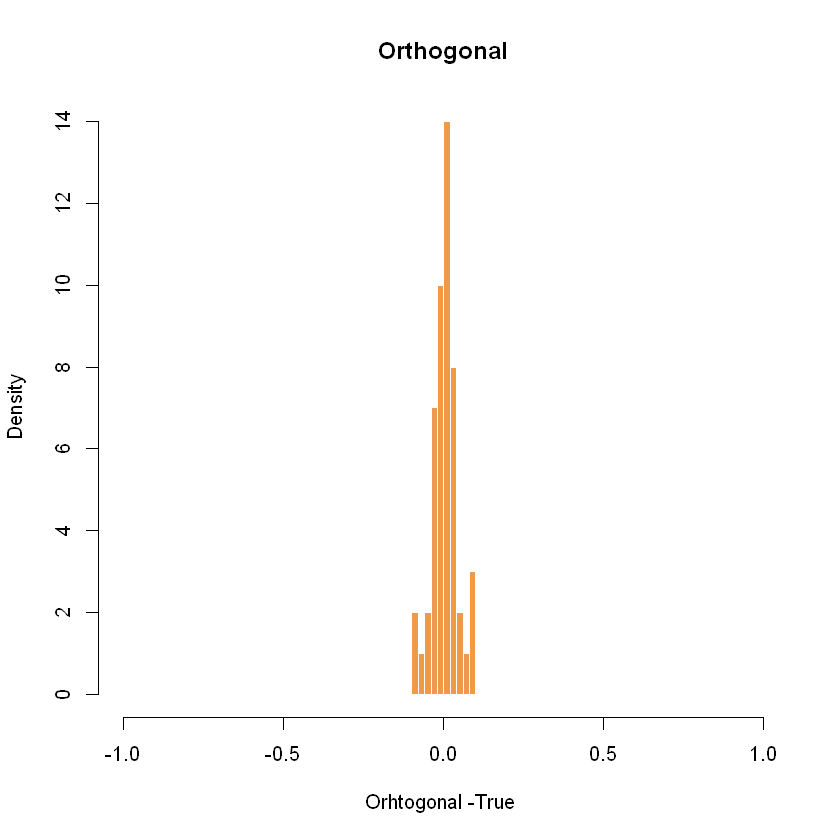

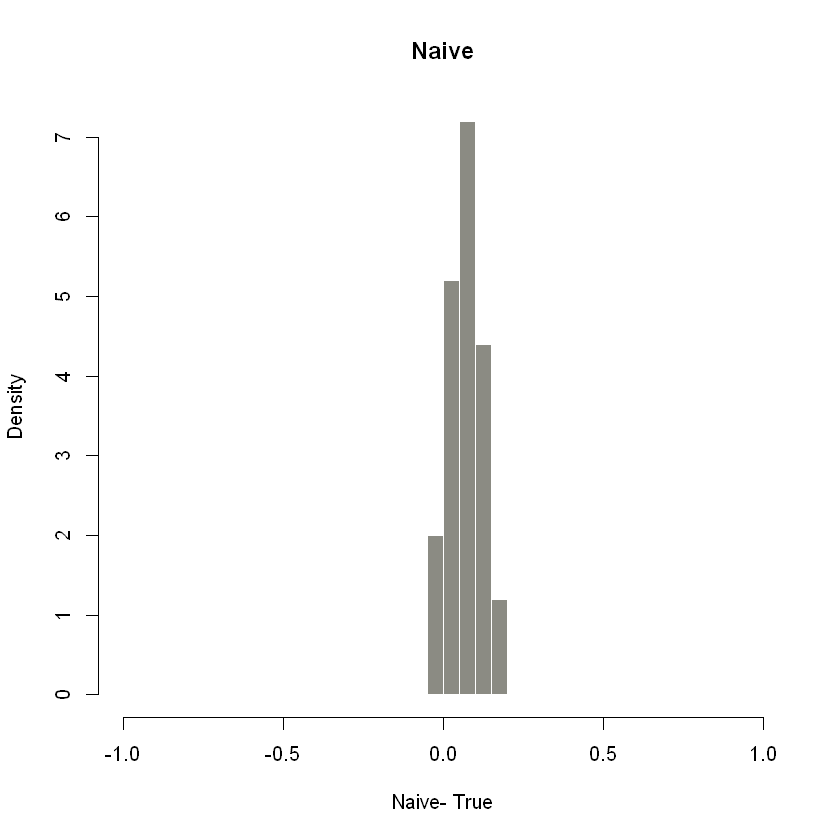

In [23]:
hist(Orthogonal-5,col="tan2", freq=F, xlim= c(-1,1), xlab= "Orhtogonal -True ", main="Orthogonal", border="white")
hist(Naive-5, col="ivory4", freq=F, xlim= c(-1,1), xlab= "Naive- True", main = "Naive", border="white")

In [ ]:
## B =100

In [24]:
library(hdm)

set.seed(1)
B= 100 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


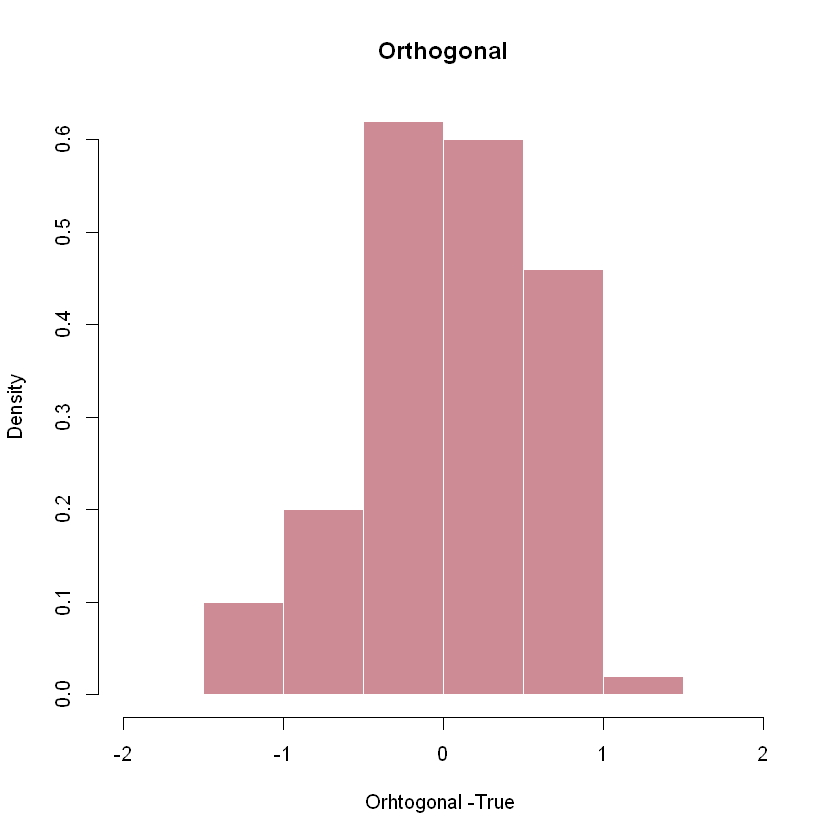

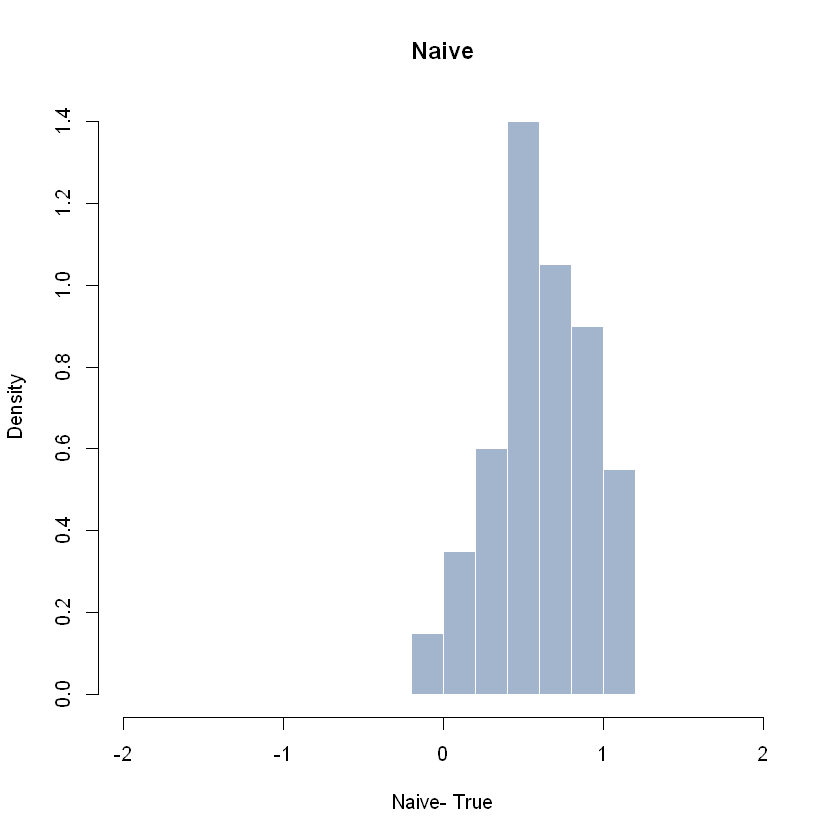

In [25]:
hist(Orthogonal-5,col="lightpink3", freq=F, xlim= c(-2,2), xlab= "Orhtogonal -True ", main="Orthogonal", border="white")
hist(Naive-5, col="lightsteelblue3", freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive", border="white")

In [ ]:
## B =1000

In [26]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

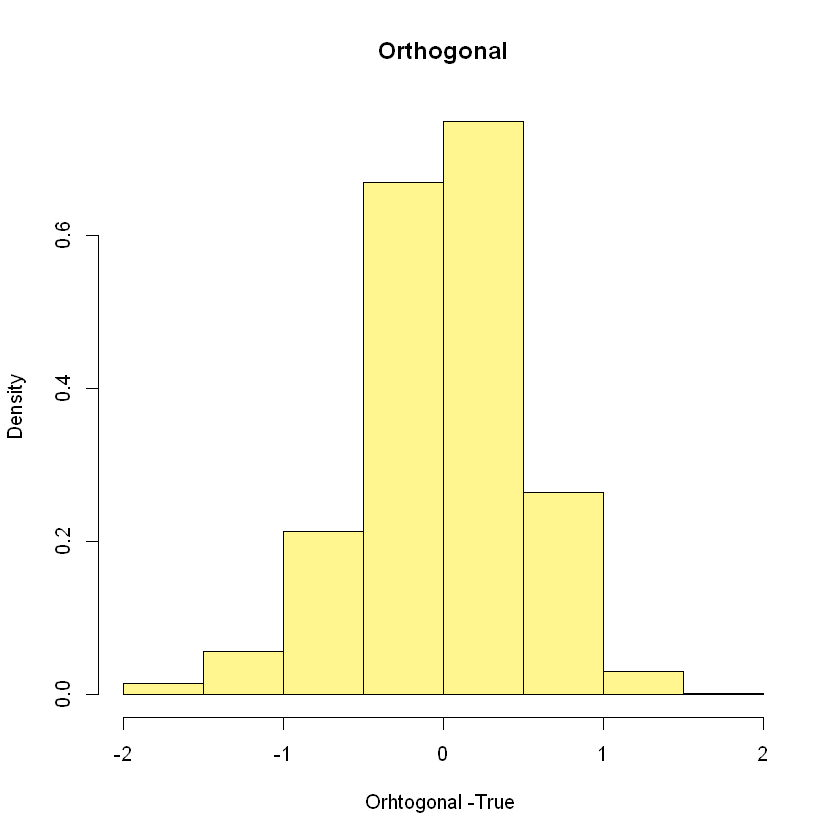

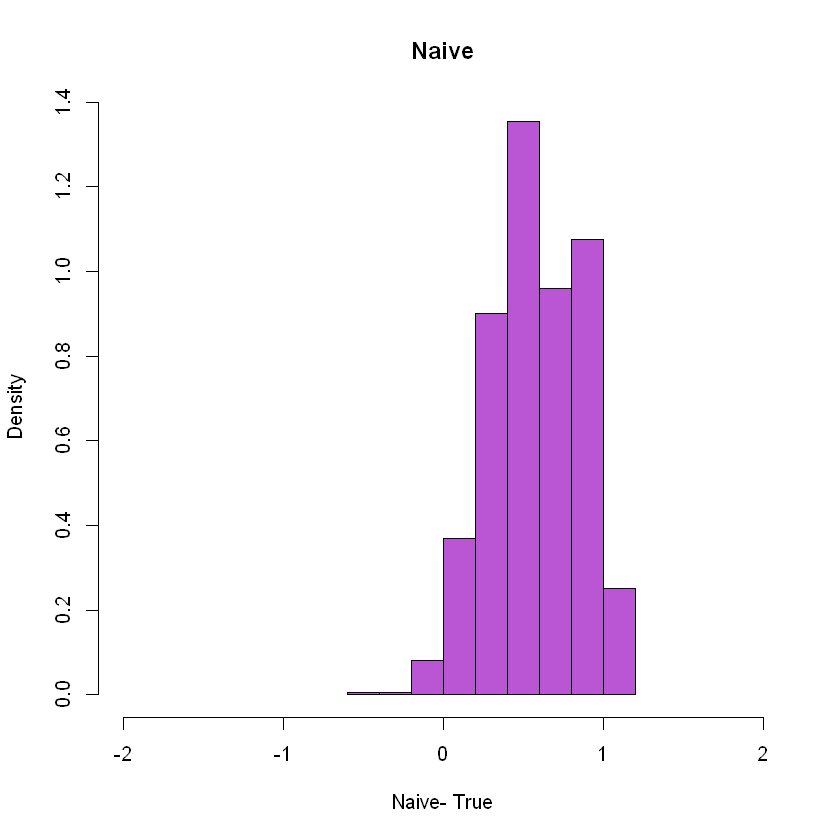

In [27]:
hist(Orthogonal-5,col="khaki1", freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col="mediumorchid", freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

Explain what you observe in the distribution of the histograms. Where the orthogonal and Naive should be centered?

In the graphs it can be seen that, in the case of the orthogonal distribution, it is centered at 0 and is more similar to a normal distribution with mean 0. In contrast, in the Naive histogram, it is more centered at 1.

Both histograms were expected to be centered at zero, this is because to construct the plots we subtract 5 from the coefficient of D, therefore the estimated values of the coefficient of D for both methods must be centered at 0

# Double Lasso - Testing the Convergence Hypothesis

1. Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

Urminsky, Hansen, and Chernozhukov present double lasso selection as a solution to the covariate selection problem. The authors explain that within this covariate selection problem there are biased parameter estimates in correlational analyses and underpower analyses even in effectively randomized experiments. To avoid these problems when identifying covariates to include in their analyses, the authors recommend that researchers should apply a double lasso regression in three steps. 


**Step 1**: Fit a lasso regression predicting the dependent variable, and keeping track of the variables with non-zero estimated coefficients: 

$$ Y_i=\alpha_0+\alpha_1W_{i1}+…+\alpha_{K}W_{iK}+\epsilon_i $$

**Step 2**: Fit a lasso regression predicting the focal independent variable, keeping track of the variables with non-zero estimated coefficients:


$$ Y_i=\delta_0+\delta_1W_{i1}+…+\delta_{K}W_{iK}+\epsilon_i $$


If $X_i$ is an effectively randomized treatment, no covariates should be selected in this step.

**Step 3**: Fit a linear regression of the dependent variable on the focal independent variable, including the covariates ($W_{ik}$) selected in either of the first two steps:

$$ Y_i=\beta_0+\beta_1 X_{i}+\Sigma_{k\in_A}\beta_{K+1}W_{iK}+\epsilon_i $$

In the equation, $A$ is the union of the variables estimated to have non-zero coefficients in Steps $1$ and $2$. This regression could also include a small set of additional covariates identified a priori as necessary. Interpret and report the coefficient estimates and significance tests on the focal variable(s) as the final results.


2. Replicate the results using the next approaches:
- OLS
- Double LASSO using cross Validation (GLMNET in R and Sklearn in Python )
- Double Lasso using theoretical Lambda (HDM package both in R and Python)
- Double Lasso using method="partialling out", this is a direct way to get results from the HDM package, check the Python script for an example, and also you have to read the documentation for more details.
- Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

# Testing the Convergence Hypothesis

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.

The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [70]:
#install.packages("hdm")

library(hdm)
library(xtable)

In [71]:
# Export data to read in python
save(GrowthData, file = "../../data/GrowthData.RData")

#GrowthData <- GrowthData

In [72]:
GrowthData

Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.02433575,1,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,...,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
0.10047257,1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,...,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
0.06705148,1,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,...,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
0.06408917,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
0.04640744,1,7.218910,0.0000,0.258865,0.020880,0.023,0.038,0.006,0.50,...,1.46,0.160,0.174,0.146,34.3,8.1,0.0634,0.0762,1.000,-0.001747
0.06733234,1,7.853605,0.0000,0.182525,0.014385,0.039,0.063,0.014,0.92,...,1.59,0.342,0.484,0.207,46.6,14.7,0.0342,0.0428,12.499,0.009092
0.02097768,1,7.703910,0.2776,0.215275,0.029713,0.024,0.035,0.013,0.69,...,1.63,0.184,0.219,0.152,34.0,16.1,0.0864,0.0931,7.000,0.011630
0.03355124,1,9.063463,0.0000,0.109614,0.002171,0.402,0.488,0.314,1.00,...,24.72,3.206,3.154,3.253,28.2,20.6,0.0594,0.0460,1.000,0.008169


In [73]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

The following objects are masked from growth (pos = 5):

    bmp1l, ex1, fert1, fert65, freeop, freetar, gde1, gdpsh465,
    geerec1, geetot1, govsh41, govwb1, gpop1, gvxdxe41, h65, hf65,
    high65, highc65, highcf65, highcm65, highf65, highm65, hm65,
    human65, humanf65, humanm65, hyr65, hyrf65, hyrm65, im1, intercept,
    invsh41, lifee065, mort1, mort65, no65, nof65, nom65, Outcome, p65,
    pf65, pinstab1, pm65, pop1565, pop65, pop6565, s65, sec65, secc65,
    seccf65, seccm65, secf65, secm65, sf65, sm65, syr65, syrf65,
    syrm65, teapri65, teasec65, tot1, worker65, xr65




[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

We determine the dimension of our data set.

In [74]:
dim(growth)

[1] 90 63

The sample contains  90  countries and  63  controls. Thus  𝑝≈60 ,  𝑛=90  and  𝑝/𝑛  is not small. We expect the least squares method to provide a poor estimate of  𝛽1 . We expect the method based on partialling-out with Lasso to provide a high quality estimate of  𝛽1 

To check this hypothesis, we analyze the relation between the output variable  𝑌  and the other country's characteristics by running a linear regression in the first step.

# OLS

In [75]:
reg.ols <- lm(Outcome~.-1,data=growth)
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.254

We determine the regression coefficient  𝛽1  of the target regressor gdpsh465 ( 𝐷 ), its 95% confidence interval and the standard error.

In [76]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [77]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3)
print(tab1,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:06:12 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>


<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:06:12 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the speed of convergence, and does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

## Double LASSO using cross Validation (GLMNET)

In [110]:
set.seed(1234)
training <- sample(nrow(growth), nrow(growth)*(3/4), replace=FALSE)

data_train <- growth[training,]
data_test <- growth[-training,]

In [111]:
data_train

,Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,0.092106277,1,6.725034,0.0266,0.179933,0.046376,0.015,0.020,0.010,0.78,...,0.86,0.258,0.382,0.137,34.6,16.5,0.0558,0.0613,20.800,-0.018514
80,0.065228560,1,7.175490,0.0000,0.179933,0.046376,0.035,0.040,0.027,0.83,...,1.23,0.332,0.451,0.219,27.9,27.2,0.0636,0.0721,20.379,0.018019
22,0.133982213,1,8.128880,0.0000,0.167210,0.003311,0.129,0.196,0.063,1.00,...,13.16,1.727,1.910,1.560,28.1,23.2,0.0570,0.0609,360.000,-0.054874
9,0.033551236,1,9.063463,0.0000,0.109614,0.002171,0.402,0.488,0.314,1.00,...,24.72,3.206,3.154,3.253,28.2,20.6,0.0594,0.0460,1.000,0.008169
5,0.027929548,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
38,0.094851094,1,8.144969,0.0000,0.235179,0.009676,0.056,0.088,0.025,1.00,...,1.43,0.439,0.598,0.299,33.7,22.5,0.0480,0.0492,59.997,0.009702
16,0.052308191,1,6.977281,0.0962,0.204611,0.077852,0.037,0.043,0.030,1.00,...,2.40,0.419,0.548,0.299,30.3,7.9,0.0668,0.0787,125.990,0.028916
4,0.064089166,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
70,0.094618168,1,8.414496,0.0000,0.374328,0.000000,0.101,0.147,0.053,1.00,...,11.80,1.846,2.369,1.301,31.1,24.3,0.5958,0.5819,4.935,0.021808


In [112]:
dim(data_train)

[1] 67 63

In [113]:
dim(data_test)

[1] 23 63

In [114]:
X <-  "gdpsh465+bmp1l+freeop+freetar+h65+hm65+hf65+p65+pm65+pf65+s65+sm65+sf65+fert65+mort65+lifee065+gpop1+fert1+mort1+invsh41+geetot1+geerec1+gde1+govwb1+govsh41+gvxdxe41+high65+highm65+highf65+highc65+highcm65+highcf65+human65+humanm65+humanf65+hyr65+hyrm65+hyrf65+no65+nom65+nof65+pinstab1+pop65+worker65+pop1565+pop6565+sec65+secm65+secf65+secc65+seccm65+seccf65+syr65+syrm65+syrf65+teapri65+teasec65+ex1+im1+xr65+tot1"
formula_lasso <- as.formula(paste("Outcome", "~", X))

lasso_model_train <- model.matrix(formula_lasso,data_train)
lasso_model_test <- model.matrix(formula_lasso,data_test)

p_basic <- dim(lasso_model_train)[2]
p_basic

[1] 62

In [115]:
Y_train <- data_train$Outcome
Y_test <- data_test$Outcome

In [116]:
library(glmnet)
fit.lasso.cv   <- cv.glmnet(lasso_model_train, Y_train, family="gaussian", alpha=1)

yhat.lasso.cv    <- predict(fit.lasso.cv, newx = lasso_model_test, s = "lambda.min")

MSE.lasso.cv <- summary(lm((Y_test-yhat.lasso.cv)^2~1))$coef[1:2]

R2.lasso.cv <- 1-MSE.lasso.cv[1]/var(Y_test)

# R^2 using cross-validation (basic model) 
cat("R^2 using cross-validation for lasso:",R2.lasso.cv)

R^2 using cross-validation for lasso: 0.04336744

In [117]:
coef_gdpsh465 <- predict(fit.lasso.cv, newx = model_X_basic_test, type="coef", s = "lambda.min")[3]
coef_gdpsh465

[1] -0.003181242

In [118]:
standar_error = Y_test - yhat.lasso.cv
standar_error = standar_error[3]
standar_error

[1] 0.02845287

In [119]:
lower_ci = coef_gdpsh465 - 1.96*standar_error
upper_ci = coef_gdpsh465 + 1.96*standar_error

In [123]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(coef_gdpsh465, standar_error, lower_ci, upper_ci)
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso - GLMNET")
tab2 <- xtable(table, digits = 4)
print(tab2,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:10:15 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso - GLMNET </td> <td align="right"> -0.0032 </td> <td align="right"> 0.0285 </td> <td align="right"> -0.0589 </td> <td align="right"> 0.0526 </td> </tr>
   </table>


<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:10:15 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso - GLMNET </td> <td align="right"> -0.0032 </td> <td align="right"> 0.0285 </td> <td align="right"> -0.0589 </td> <td align="right"> 0.0526 </td> </tr>
   </table>

## Double Lasso using theoretical Lambda

In [124]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [125]:
r.Y <- rlasso(x=W,y=Y)$res
r.D <- rlasso(x=W,y=D)$res

In [126]:
partial.lasso <- lm(r.Y ~ r.D)

In [127]:
partial.lasso


Call:
lm(formula = r.Y ~ r.D)

Coefficients:
(Intercept)          r.D  
  2.931e-17   -4.981e-02  


In [147]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residuoal" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso_theo <- partial.lasso$coef[2]
std_lasso_theo <- summary(partial.lasso)$coef[2,2]
ci_lasso_theo <- confint(partial.lasso)[2,]

In [148]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso_theo,std_lasso_theo,ci_lasso_theo[1],ci_lasso_theo[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso Theorical Lambda")
tab3 <- xtable(table, digits = 3)
print(tab3,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:24:45 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso Theorical Lambda </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:24:45 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso Theorical Lambda </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>

Lasso provides a more precise estimate (lower standard error). The Lasso based point estimate is about  5%  and the  95%  confidence interval for the (annual) rate of convergence is  7.8%  to  2.2% . This empirical evidence does support the convergence hypothesis.

## Double Lasso using method "partialling out" 

In [130]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [131]:
lasso_direct = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
lasso_direct


Call:
rlassoEffect(x = W, y = Y, d = D, method = "partialling out")

Coefficients:
[1]  -0.04981


In [132]:
est_lasso = lasso_direct$coefficients
std_lasso = lasso_direct$se
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [133]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso - Partialling Out")
tab4<- xtable(table, digits = 3)
print(tab4,type="html") # set type="latex" for printing table in LaTeX


<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:11:08 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso - Partialling Out </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


<!-- html table generated in R 4.1.3 by xtable 1.8-4 package -->
<!-- Sat May 07 03:11:08 2022 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso - Partialling Out </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>

Lasso provides a more precise estimate (lower standard error). The Lasso based point estimate is about  5%  and the  95%  confidence interval for the (annual) rate of convergence is  7.7%  to  2.2% .

## Summary

Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

In [136]:
Final=rbind(tab1,tab2,tab3,tab4)
Final

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.02988773,-0.07060022,0.05184424
Double Lasso - GLMNET,-0.003181242,0.02845287,-0.05894887,0.05258638
Double Lasso Theorical Lambda,-0.049811465,0.01393636,-0.07750705,-0.02211588
Double Lasso - Partialling Out,-0.049811465,0.01393636,-0.07750705,-0.02211588


In [158]:
coef.vect.o <- c(as.double(est_ols), as.double(coef_gdpsh465), as.double(est_lasso_theo), as.double(est_lasso))
coef.vect.o

[1] -0.009377989 -0.003181242 -0.049811465 -0.049811465

In [159]:
sd.vect.o <- c(as.double(std_ols), as.double(1), as.double(std_lasso_theo), as.double(std_lasso))
sd.vect.o

[1] 0.02988773 1.00000000 0.01393636 0.01393636

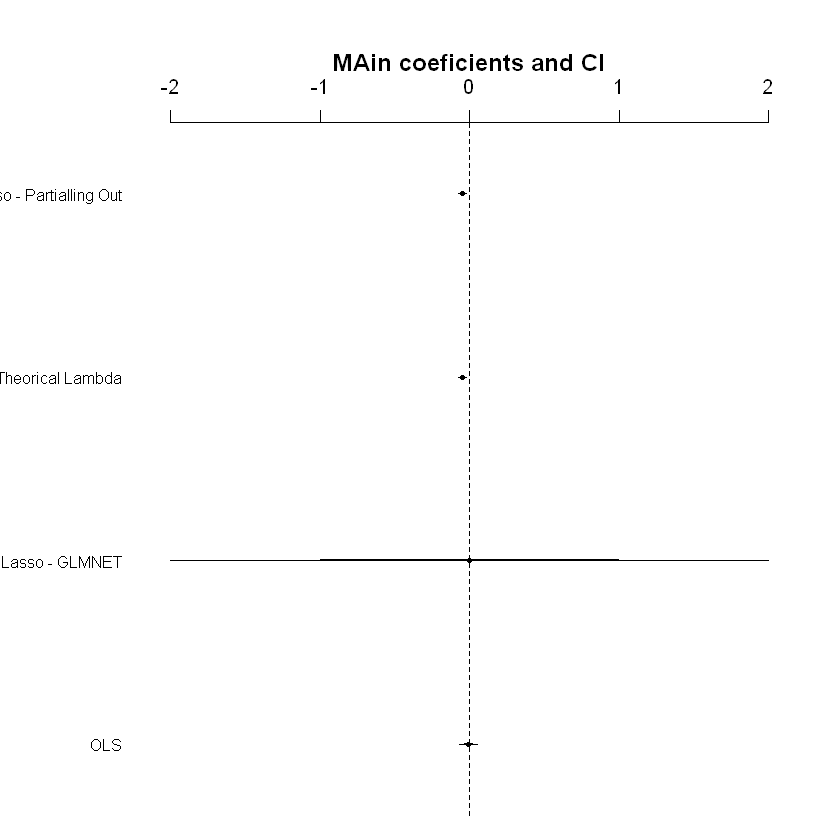

In [162]:
library(xtable)
library(arm)
longnames <- c("OLS", "Double Lasso - GLMNET","Double Lasso Theorical Lambda", "Double Lasso - Partialling Out")
coefplot(coef.vect.o, sd.vect.o, varnames=longnames, main="MAin coeficients and CI")

## Neyman Orthogonality Proof

Probando la condicion de orgonalidad de Neyman

Sea la siguiente regresión. Me interesa obtener el efecto de D sobre Y, y hay una alta cantidad de covariables en que están dentro de la matriz W. Realizo regresión doble lasso para obtener $\alpha$.

\begin{align} 
{Y}= \alpha D +  \beta_2 W + {e}   
\end{align}

Los pasos son: 

1. Hallar los estimadores de las regresiones lasso de Y con W y D con W. ($ \hat{\delta}_{YW}$, $\hat{\delta}_{DW}$)

2. Obtener los residuos 
 
- $\tilde{Y} = Y - \hat{\delta}_{YW} W$
- $\tilde{D} = D - \hat{\delta}_{DW} W$

3. Regresionar un OLS con los residuos del paso 2. Así se obtiene rápidamente la estimación del efecto de D sobre Y: $\alpha$

Sea $\eta$ el siguiente vector: 

$\eta^o$ = ($ \hat{\delta}_{YW}$, $\hat{\delta}_{DW}$)

Dado que $\alpha$ es una forma funcional de los estimadores ($\hat{\delta}_{YW}$, $\hat{\delta}_{DW}$), es una función de $\eta$ 

\begin{align} 
 \alpha(\eta^o)
\end{align}

El partialling out funciona porque por la ortogonalidad de Neyman, $\alpha$ es insensible a perturbaciones locales de los parametros al rededor de los verdaderos parametros

\begin{align} 
 D = \frac{d}{d \eta^o}\alpha(\eta^o)= 0
\end{align}

### Demostración matemática

\begin{align}
\alpha = argmin E(\tilde{Y} - a \tilde{D})^2
\end{align}

Notar que $a = \alpha$ resuelve la ecuación
\begin{align}
 E[(\hat{Y} - a \tilde{D}) \tilde{D}] = 0 
\end{align}

Definamos $\eta^o = (\hat{\delta}_{YW}, \hat{\delta}_{DW}) = (\eta_1,\eta_2)$

Sea $M(a,\eta^o) = E[(\tilde{Y}(\eta_1) - a\tilde{D}(\eta_2))\tilde{D}(\eta_2)] = 0$ (D es ortogonal a los residuos)

#### Por el teorema de la función implicita 

En el óptimo $\alpha = a $

$ M(\alpha,\eta^o) = 0 $

\begin{align}
 \frac{d \alpha}{d \eta^o} = - (\frac{d M}{d \alpha})^{-1}  (\frac{d M}{d \eta^o}) = 0
\end{align}

Como el primer término de la expresión anterior no puede ser cero, tenemos que probar que $(\frac{d M}{d \eta^o}) = 0$

\begin{align}
  \frac{d M}{d \eta^o} = \frac{d M}{d \eta_1} + \frac{d M}{d \eta_2}
\end{align}

Cada uno de los terminos que se están sumando en la ecuación anterior deben ser cero.

Primero recordar que:

- 
\begin{align}
  \tilde{Y}(\eta_1) = Y -  W\eta_1
\end{align}

\begin{align}
  \frac{d \tilde{Y}(\eta_1)}{d\eta_1} = -W
\end{align}

- 
\begin{align}
  \tilde{D}(\eta_2)= D - W\eta_2
\end{align}

\begin{align}
  \frac{d \tilde{D}(\eta_2}{d\eta_2} = -W
\end{align}

Entonces:

1. 
\begin{align}
  \frac{d M}{d \eta_1} = E[(\frac{d \tilde{Y}(\eta_1)}{d\eta_1})\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_1} = E[-W(D-W\eta_2]
\end{align}

\begin{align}
  \frac{d M}{d \eta_1} = -E[WD-WW(W'W)^{-1}WD]
\end{align}

\begin{align}
  \frac{d M}{d \eta_1}= -E[0] = 0
\end{align}


2. 
\begin{align}
  \frac{d M}{d \eta_2} = E[-a (\frac{d \tilde{D}(\eta_2)}{d\eta_2})\tilde{D} + (\frac{d \tilde{D}(\eta_2)}{d\eta_2})(\tilde{Y} - a\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[-a W \tilde{D} + W(\tilde{Y}- a\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[W\tilde{Y} - 2 \alpha W\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[W\tilde{Y}] + 2 \alpha E[W\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[WY - WW(W'W)^{-1}WY] + 2 \alpha E[WD - WW(W'W)^{-1}WD]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[0] + 2 \alpha E[0] = 0
\end{align}

Por lo tanto, 

\begin{align}
 \frac{d M}{d \eta^o} = 0
\end{align}

Entonces, hemos demostrado que 

$\frac{d \alpha}{d \eta^o} = - (\frac{d M}{d \alpha})^{-1}  (\frac{d M}{d \eta^o}) = 0$